In [1]:
import os
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# set up image augmentation
datagen = ImageDataGenerator(rotation_range=15, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 13s 0us/step


In [ ]:
def create_model():
  
  inputs = tf.keras.layers.Input(shape=(32,32,3), name='input')
  x = tf.keras.layers.Conv2D(32, (3,3), activation='relu',strides=(1, 1), padding='same')(inputs)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.layers.Conv2D(32, (3,3), activation='relu',strides=(1, 1), padding='same')(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1, 1))(x)    # reduces to 16x16x3xnum_filters

  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='same')(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='same')(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1, 1))(x)    # reduces to 8x8x3x(2*num_filters)

  x = tf.keras.layers.Conv2D(128, (3,3), activation='relu', strides=(1, 1), padding='same')(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.layers.Conv2D(128, (3,3), activation='relu', strides=(1, 1), padding='same')(x)
  x = tf.keras.layers.BatchNormalization(axis=-1)(x)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1))(x)    # reduces to 4x4x3x(4*num_filters)


  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  outputs = tf.keras.layers.Dense(10, activation='softmax', name='outputs')(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

In [ ]:
model = create_model()
opt = tf.keras.optimizers.Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)        1849

In [ ]:
history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
391/390 [==============================] - 35s 90ms/step - loss: 1.6833 - accuracy: 0.4543 - val_loss: 2.3909 - val_accuracy: 0.2661
Epoch 2/100
391/390 [==============================] - 35s 88ms/step - loss: 1.1263 - accuracy: 0.6079 - val_loss: 0.8969 - val_accuracy: 0.6863
Epoch 3/100
391/390 [==============================] - 34s 87ms/step - loss: 0.9046 - accuracy: 0.6799 - val_loss: 0.8997 - val_accuracy: 0.6891
Epoch 4/100
391/390 [==============================] - 34s 87ms/step - loss: 0.8043 - accuracy: 0.7172 - val_loss: 0.8867 - val_accuracy: 0.7063
Epoch 5/100
391/390 [==============================] - 34s 87ms/step - loss: 0.7963 - accuracy: 0.7205 - val_loss: 0.9618 - val_accuracy: 0.6813
Epoch 6/100
391/390 [==============================] - 34s 87ms/step - loss: 0.7199 - accuracy: 0.7494 - val_loss: 0.8916 - val_accuracy: 0.7091
Epoch 7/100
391/390 [==============================] - 34s 87ms/step - loss: 0.6542 - accuracy: 0.7726 - val_loss: 0.6684 - val_ac

In [ ]:
#training accuracy
train_acc = model.evaluate(x_train,y_train,batch_size=128)
train_acc

391/391 [==============================] - 8s 21ms/step - loss: 0.0728 - accuracy: 0.9760


[0.07283885031938553, 0.9759799838066101]

In [ ]:
#test accuracy
test_acc = model.evaluate(x_test,y_test,batch_size=128)
test_acc

79/79 [==============================] - 2s 20ms/step - loss: 0.4542 - accuracy: 0.8856


[0.454222172498703, 0.8855999708175659]

In [39]:
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

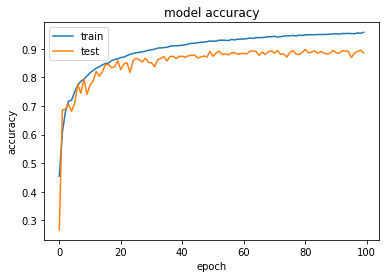

In [ ]:
plothist(history)
# before val_acc was 0.8927
# strides on maxpooling was giving 0.8973
# strides on conv2d was giving 0.9003

Now lets build model for kerastuner and from that obtain best params and train the model

In [3]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 6.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=2b6321ada82d4786b423cd3235f687a02ef590d3e4fba07925874afc31f285af
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=8a84809ed9ddd82d486b0bda6c31e4cdf46752554a3d09de2b7d69835bb63b33
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [4]:
from kerastuner import HyperModel

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):

      inputs = tf.keras.layers.Input(shape=(32,32,3), name='input')
      x = tf.keras.layers.Conv2D(32, (3,3), activation='relu',strides=(1, 1), padding='same')(inputs)
      x = tf.keras.layers.BatchNormalization(axis=-1)(x)
      x = tf.keras.layers.Conv2D(32, (3,3), activation='relu',strides=(1, 1), padding='same')(x)
      x = tf.keras.layers.BatchNormalization(axis=-1)(x)
      x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1))(x)
      x = tf.keras.layers.Dropout(0.25)(x)

      x = tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='same')(x)
      x = tf.keras.layers.BatchNormalization(axis=-1)(x)
      x = tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='same')(x)
      x = tf.keras.layers.BatchNormalization(axis=-1)(x)
      x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1))(x) 
      x = tf.keras.layers.Dropout(0.25)(x)


      x =  tf.keras.layers.Conv2D(hp.Choice('num_filters', values=[128,162], default=128), (3,3),
                                  activation=hp.Choice('cnn_activation', values=['relu', 'tanh'], default='relu'),
                                  padding=hp.Choice('padding', values=['same', 'valid'], default='same'))(x)
      x = tf.keras.layers.BatchNormalization(axis=-1)(x)
      x = tf.keras.layers.Conv2D(hp.Choice('num_filters', values=[128,162], default=128), (3,3),
                                  activation=hp.Choice('cnn_activation', values=['relu', 'tanh'], default='relu'),
                                  padding=hp.Choice('padding', values=['same', 'valid'], default='same'))(x)
      x = tf.keras.layers.BatchNormalization(axis=-1)(x)
      x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
      x = tf.keras.layers.Dropout(0.25)(x)


      x = tf.keras.layers.Flatten()(x)
      x = tf.keras.layers.Dense(units=hp.Int('units', min_value=128, max_value=512, step=32, default=512), 
                                activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu'))(x)
      x = tf.keras.layers.BatchNormalization()(x)
      x = tf.keras.layers.Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.05, default=0.5))(x)
      outputs = tf.keras.layers.Dense(10, activation='softmax', name='outputs')(x)
      model = tf.keras.Model(inputs, outputs)

      model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=0.00001, max_value=0.001, sampling='LOG', default=0.0001), decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
                    loss='categorical_crossentropy', metrics=['accuracy'])
      return model

In [33]:
from kerastuner.tuners import (BayesianOptimization, Hyperband, RandomSearch)
import time
seed=1
Max_trials = 2
Execution_per_trials = 2
Bayesian_num_initial_points = 1

def tuners(hpmodel, directory, project_name):
  random_tuner = RandomSearch(hpmodel, objective='val_accuracy', seed=seed, max_trials=Max_trials, executions_per_trial=Execution_per_trials,
                              directory=f"{directory}_randomsearch", project_name=project_name)
  
  hyperband_tuner = Hyperband(hpmodel, max_epochs=10, objective='val_accuracy', seed=seed, executions_per_trial=Execution_per_trials,
                              directory=f"{directory}_hyperband_tuner", project_name=project_name)
  
  bayesian_tuner = BayesianOptimization(hpmodel, objective='val_accuracy', seed=seed, num_initial_points=Bayesian_num_initial_points, 
                                        max_trials=Max_trials, directory=f"{directory}_bayesian", project_name=project_name)
  
  return [random_tuner, hyperband_tuner, bayesian_tuner]



def tuner_evalution(tuner, x_test, x_train, y_test, y_train):
  # overview of task
  tuner.search_space_summary()
  # perform the hyperparameter tuning
  print('start tuning')
  search_start = time.time()
  tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
  search_end = time.time()
  elapsed_time = search_start - search_end

  # show the summary of the search
  tuner.results_summary()

  # the best model
  best_model = tuner.get_best_models(num_models=1)[0]

  # evaluate the best model
  loss, accuracy = best_model.evaluate(x_test, y_test)
  return elapsed_time, loss, accuracy


Here we had taken all the tuner and ofcourse it is timetaking so only use that tuner which suits best in your problem

In [6]:
hypermodel = CNNHyperModel(input_shape=(32,32,3), num_classes=10)

output_dir = ("/content/drive/My Drive/Cifar-10")
tuners = tuners(hypermodel, directory=output_dir, project_name="simple_cnn_tuning")

results = []
for tuner in tuners:
    elapsed_time, loss, accuracy = tuner_evalution(tuner, x_test, x_train, y_test, y_train)

    print(f"Elapsed time = {elapsed_time:10.4f} s, accuracy = {accuracy}, loss = {loss}")

    results.append([elapsed_time, loss, accuracy])
print(results)

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Cifar-10_randomsearch/simple_cnn_tuning/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/Cifar-10_randomsearch/simple_cnn_tuning/tuner0.json
INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Cifar-10_hyperband_tuner/simple_cnn_tuning/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/Cifar-10_hyperband_tuner/simple_cnn_tuning/tuner0.json


start tuning
INFO:tensorflow:Oracle triggered exit


313/313 [==============================] - 2s 5ms/step - loss: 0.6839 - accuracy: 0.7905
Elapsed time =    -0.0019 s, accuracy = 0.7904999852180481, loss = 0.6839138865470886


start tuning
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2453 - accuracy: 0.5676 - val_loss: 1.0562 - val_accuracy: 0.6346
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8164 - accuracy: 0.7154 - val_loss: 0.7914 - val_accuracy: 0.7332
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6512 - accuracy: 0.7735 - val_loss: 0.6624 - val_accuracy: 0.7689
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5109 - accuracy: 0.8229 - val_loss: 0.6294 - val_accuracy: 0.7880
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.3864 - accuracy: 0.8661 - val_loss: 0.6805 - val_accuracy: 0.7840
Epoch 10/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.2844 - accuracy: 0.9018 - val_loss: 0.6259 - val_accuracy: 0.8028
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2274 - accuracy: 0.5719 - val_

Epoch 1/4
1563/1563 [==============================] - 35s 22ms/step - loss: 1.7945 - accuracy: 0.4007 - val_loss: 2.8290 - val_accuracy: 0.2579
Epoch 2/4
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3764 - accuracy: 0.5200 - val_loss: 2.6405 - val_accuracy: 0.2918
Epoch 3/4
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2242 - accuracy: 0.5700 - val_loss: 2.1199 - val_accuracy: 0.3789
Epoch 4/4
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1110 - accuracy: 0.6098 - val_loss: 2.0224 - val_accuracy: 0.4013
Epoch 1/4
1563/1563 [==============================] - 35s 22ms/step - loss: 1.8178 - accuracy: 0.3961 - val_loss: 1.8893 - val_accuracy: 0.4132
Epoch 2/4
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3579 - accuracy: 0.5262 - val_loss: 2.0331 - val_accuracy: 0.4171
Epoch 3/4
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1972 - accuracy: 0.5829 - val_loss: 1.7195 - val_ac

Epoch 1/4
1563/1563 [==============================] - 46s 30ms/step - loss: 1.5002 - accuracy: 0.4680 - val_loss: 3.3661 - val_accuracy: 0.4085
Epoch 2/4
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1699 - accuracy: 0.5877 - val_loss: 3.2279 - val_accuracy: 0.3934
Epoch 3/4
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0325 - accuracy: 0.6371 - val_loss: 1.6971 - val_accuracy: 0.5526
Epoch 4/4
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9443 - accuracy: 0.6696 - val_loss: 1.5227 - val_accuracy: 0.5860
Epoch 1/4
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5008 - accuracy: 0.4688 - val_loss: 2.8112 - val_accuracy: 0.4742
Epoch 2/4
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1670 - accuracy: 0.5903 - val_loss: 2.9974 - val_accuracy: 0.4506
Epoch 3/4
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0326 - accuracy: 0.6411 - val_loss: 2.3909 - val_ac

Epoch 1/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.7975 - accuracy: 0.3706 - val_loss: 1.5872 - val_accuracy: 0.4348
Epoch 2/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3661 - accuracy: 0.5114 - val_loss: 1.3759 - val_accuracy: 0.5253
Epoch 3/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2179 - accuracy: 0.5658 - val_loss: 1.4061 - val_accuracy: 0.5082
Epoch 4/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1448 - accuracy: 0.5956 - val_loss: 1.0210 - val_accuracy: 0.6411
Epoch 1/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.7930 - accuracy: 0.3603 - val_loss: 1.4263 - val_accuracy: 0.4822
Epoch 2/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3823 - accuracy: 0.5054 - val_loss: 1.3405 - val_accuracy: 0.5213
Epoch 3/4
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2568 - accuracy: 0.5519 - val_loss: 1.1728 - val_ac

Epoch 1/4
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6992 - accuracy: 0.3919 - val_loss: 2.8124 - val_accuracy: 0.3559
Epoch 2/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4132 - accuracy: 0.4924 - val_loss: 1.8757 - val_accuracy: 0.4559
Epoch 3/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.2614 - accuracy: 0.5532 - val_loss: 1.4594 - val_accuracy: 0.5027
Epoch 4/4
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1427 - accuracy: 0.6007 - val_loss: 1.4370 - val_accuracy: 0.5376
Epoch 1/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6664 - accuracy: 0.4090 - val_loss: 2.8241 - val_accuracy: 0.3765
Epoch 2/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3571 - accuracy: 0.5151 - val_loss: 1.6276 - val_accuracy: 0.4887
Epoch 3/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1979 - accuracy: 0.5809 - val_loss: 1.2140 - val_ac

Epoch 1/4
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3623 - accuracy: 0.5410 - val_loss: 1.1065 - val_accuracy: 0.6247
Epoch 2/4
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8701 - accuracy: 0.6977 - val_loss: 0.8015 - val_accuracy: 0.7236
Epoch 3/4
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7081 - accuracy: 0.7532 - val_loss: 0.8604 - val_accuracy: 0.7100
Epoch 4/4
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6230 - accuracy: 0.7824 - val_loss: 0.6997 - val_accuracy: 0.7659
Epoch 1/4
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3889 - accuracy: 0.5266 - val_loss: 1.0816 - val_accuracy: 0.6393
Epoch 2/4
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8784 - accuracy: 0.6930 - val_loss: 0.9182 - val_accuracy: 0.6751
Epoch 3/4
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7197 - accuracy: 0.7478 - val_loss: 0.8822 - val_ac

Epoch 1/4
1563/1563 [==============================] - 34s 21ms/step - loss: 1.7491 - accuracy: 0.3767 - val_loss: 1.7653 - val_accuracy: 0.4369
Epoch 2/4
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4409 - accuracy: 0.4866 - val_loss: 1.3573 - val_accuracy: 0.5551
Epoch 3/4
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2617 - accuracy: 0.5563 - val_loss: 1.2040 - val_accuracy: 0.5768
Epoch 4/4
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1398 - accuracy: 0.5998 - val_loss: 1.0906 - val_accuracy: 0.6148
Epoch 1/4
1563/1563 [==============================] - 34s 21ms/step - loss: 1.7827 - accuracy: 0.3693 - val_loss: 2.5961 - val_accuracy: 0.3902
Epoch 2/4
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4935 - accuracy: 0.4669 - val_loss: 1.4613 - val_accuracy: 0.5004
Epoch 3/4
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3424 - accuracy: 0.5264 - val_loss: 1.2919 - val_ac

Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3718 - accuracy: 0.5371 - val_loss: 1.0115 - val_accuracy: 0.6510
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8532 - accuracy: 0.7040 - val_loss: 0.8030 - val_accuracy: 0.7154
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7032 - accuracy: 0.7550 - val_loss: 0.7252 - val_accuracy: 0.7505
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5886 - accuracy: 0.7952 - val_loss: 0.6216 - val_accuracy: 0.7864
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4855 - accuracy: 0.8308 - val_loss: 0.6454 - val_accuracy: 0.7896
Epoch 10/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4110 - accuracy: 0.8566 - val_loss: 0.6551 - val_accuracy: 0.7937
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3961 - accuracy: 0.5268 - val_loss: 1.3700 

Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.7663 - accuracy: 0.3752 - val_loss: 1.4178 - val_accuracy: 0.4865
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3622 - accuracy: 0.5101 - val_loss: 1.1858 - val_accuracy: 0.5700
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2325 - accuracy: 0.5629 - val_loss: 1.1749 - val_accuracy: 0.5710
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1505 - accuracy: 0.5929 - val_loss: 1.1661 - val_accuracy: 0.5826
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0968 - accuracy: 0.6138 - val_loss: 1.7676 - val_accuracy: 0.4035
Epoch 10/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0559 - accuracy: 0.6294 - val_loss: 1.0173 - val_accuracy: 0.6471
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.7549 - accuracy: 0.3725 - val_loss: 1.7329 

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5589 - accuracy: 0.4548 - val_loss: 2.0851 - val_accuracy: 0.4486
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1871 - accuracy: 0.5806 - val_loss: 2.0185 - val_accuracy: 0.4674
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0286 - accuracy: 0.6395 - val_loss: 1.2698 - val_accuracy: 0.5874
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9336 - accuracy: 0.6740 - val_loss: 1.1890 - val_accuracy: 0.6132
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8501 - accuracy: 0.7044 - val_loss: 0.9170 - val_accuracy: 0.6952
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7846 - accuracy: 0.7276 - val_loss: 0.9720 - val_accuracy: 0.6812
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7159 - accuracy: 0.7497 - val_loss: 0.9557 -

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.2054 - accuracy: 0.5737 - val_loss: 2.5176 - val_accuracy: 0.5710
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8859 - accuracy: 0.6922 - val_loss: 1.2924 - val_accuracy: 0.5632
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7887 - accuracy: 0.7242 - val_loss: 0.7845 - val_accuracy: 0.7278
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6275 - accuracy: 0.7794 - val_loss: 0.7352 - val_accuracy: 0.7484
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5409 - accuracy: 0.8118 - val_loss: 0.6653 - val_accuracy: 0.7779
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4571 - accuracy: 0.8419 - val_loss: 0.7369 - val_accuracy: 0.7572
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.3859 - accuracy: 0.8664 - val_loss: 0.8108 -

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4789 - accuracy: 0.4680 - val_loss: 1.5715 - val_accuracy: 0.4777
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1408 - accuracy: 0.5989 - val_loss: 1.2904 - val_accuracy: 0.5818
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0223 - accuracy: 0.6419 - val_loss: 1.2107 - val_accuracy: 0.6053
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9495 - accuracy: 0.6684 - val_loss: 1.0984 - val_accuracy: 0.6289
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8894 - accuracy: 0.6874 - val_loss: 0.9381 - val_accuracy: 0.6761
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8331 - accuracy: 0.7083 - val_loss: 0.9414 - val_accuracy: 0.6808
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7950 - accuracy: 0.7216 - val_loss: 0.9219 -

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.1674 - accuracy: 0.3360 - val_loss: 5.8059 - val_accuracy: 0.3760
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6056 - accuracy: 0.4419 - val_loss: 4.4685 - val_accuracy: 0.4142
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4330 - accuracy: 0.4957 - val_loss: 3.3787 - val_accuracy: 0.4512
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.3189 - accuracy: 0.5358 - val_loss: 2.9389 - val_accuracy: 0.4974
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.2316 - accuracy: 0.5679 - val_loss: 2.7135 - val_accuracy: 0.4835
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1658 - accuracy: 0.5919 - val_loss: 2.1305 - val_accuracy: 0.5322
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1049 - accuracy: 0.6162 - val_loss: 1.7327 -

INFO:tensorflow:Oracle triggered exit


313/313 [==============================] - 2s 7ms/step - loss: 0.6259 - accuracy: 0.8028
Elapsed time = -6083.3329 s, accuracy = 0.8027999997138977, loss = 0.6259064078330994


start tuning
Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7898 - accuracy: 0.4077 - val_loss: 4.2375 - val_accuracy: 0.4040
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3124 - accuracy: 0.5388 - val_loss: 3.2025 - val_accuracy: 0.4769
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1408 - accuracy: 0.6008 - val_loss: 1.8231 - val_accuracy: 0.5580
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0315 - accuracy: 0.6415 - val_loss: 1.6176 - val_accuracy: 0.5817
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9392 - accuracy: 0.6724 - val_loss: 1.3563 - val_accuracy: 0.6265
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8671 - accuracy: 0.6970 - val_loss: 1.3320 - val_accuracy: 0.6299
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8070 - accuracy: 0.7203 - val_l

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2886 - accuracy: 0.5508 - val_loss: 1.0610 - val_accuracy: 0.6266
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8944 - accuracy: 0.6871 - val_loss: 0.9986 - val_accuracy: 0.6572
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7462 - accuracy: 0.7395 - val_loss: 0.8872 - val_accuracy: 0.6968
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6429 - accuracy: 0.7749 - val_loss: 0.7608 - val_accuracy: 0.7434
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.5596 - accuracy: 0.8062 - val_loss: 0.8206 - val_accuracy: 0.7258
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.4967 - accuracy: 0.8262 - val_loss: 0.8431 - val_accuracy: 0.7284
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.4007 - accuracy: 0.8593 - val_loss: 0.7351 -

INFO:tensorflow:Oracle triggered exit


313/313 [==============================] - 2s 8ms/step - loss: 0.7887 - accuracy: 0.7635
Elapsed time =  -747.1259 s, accuracy = 0.7634999752044678, loss = 0.7886634469032288
[[-0.0019321441650390625, 0.6839138865470886, 0.7904999852180481], [-6083.332864522934, 0.6259064078330994, 0.8027999997138977], [-747.1258900165558, 0.7886634469032288, 0.7634999752044678]]


I had only done 10 epochs for getting good parameters as it was taking long time for more epochs so thats why i had taken only 10 by this also we can get good hyperparameter and from that we can build our model see the code below we can get this by using (get_best_hyperparameters) function 

In [34]:
hypermodel = CNNHyperModel(input_shape=(32,32,3), num_classes=10)

output_dir = ("/content/drive/My Drive/Cifar-10")
tuners = tuners(hypermodel, directory=output_dir, project_name="simple_cnn_tuning")

for tuner in tuners:
  best_model = tuner.get_best_hyperparameters(num_trials = 1)[0]
  model_2 = tuner.hypermodel.build(best_model)

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Cifar-10_randomsearch/simple_cnn_tuning/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/Cifar-10_randomsearch/simple_cnn_tuning/tuner0.json
INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Cifar-10_hyperband_tuner/simple_cnn_tuning/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/Cifar-10_hyperband_tuner/simple_cnn_tuning/tuner0.json
INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Cifar-10_bayesian/simple_cnn_tuning/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/Cifar-10_bayesian/simple_cnn_tuning/tuner0.json


In [35]:
history_2=model_2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
391/390 [==============================] - 36s 91ms/step - loss: 1.3792 - accuracy: 0.5149 - val_loss: 2.1840 - val_accuracy: 0.3320
Epoch 2/100
391/390 [==============================] - 35s 90ms/step - loss: 1.0246 - accuracy: 0.6370 - val_loss: 0.9191 - val_accuracy: 0.6878
Epoch 3/100
391/390 [==============================] - 35s 90ms/step - loss: 0.8932 - accuracy: 0.6862 - val_loss: 0.9036 - val_accuracy: 0.6929
Epoch 4/100
391/390 [==============================] - 35s 90ms/step - loss: 0.8077 - accuracy: 0.7152 - val_loss: 0.7652 - val_accuracy: 0.7333
Epoch 5/100
391/390 [==============================] - 35s 90ms/step - loss: 0.7440 - accuracy: 0.7391 - val_loss: 0.8056 - val_accuracy: 0.7236
Epoch 6/100
391/390 [==============================] - 36s 92ms/step - loss: 0.6986 - accuracy: 0.7544 - val_loss: 0.7925 - val_accuracy: 0.7361
Epoch 7/100
391/390 [==============================] -

I had change the model so accuracy will also change i had change the model coz of time purpose in performing tuner so if you will perform with same model as baseline model then for sure you will see the difference in accuracy after performing keras tuner and getting good hyperparameter.

In [36]:
#training accuracy
train_acc_2 = model_2.evaluate(x_train,y_train,batch_size=128)
train_acc_2

391/391 [==============================] - 9s 24ms/step - loss: 0.0744 - accuracy: 0.9734


[0.07437843084335327, 0.9734399914741516]

In [37]:
#test accuracy
test_acc_2 = model_2.evaluate(x_test,y_test,batch_size=128)
test_acc_2

79/79 [==============================] - 2s 25ms/step - loss: 0.5224 - accuracy: 0.8677


[0.5223975777626038, 0.8676999807357788]

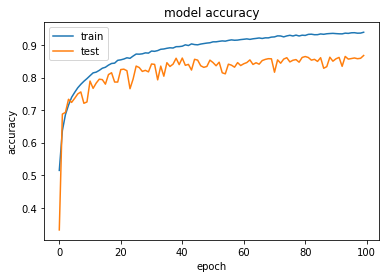

In [40]:
plothist(history_2)